<a href="https://colab.research.google.com/github/parag7498/-sparks-decision-tree-/blob/main/Copy_of_Untitled11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D, Dropout , Flatten ,  Dense 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
main_dir = "/content/drive/MyDrive/DATASET"

In [ ]:
train_dir = os.path.join(main_dir,'train')
test_dir = os.path.join(main_dir,'test')

train_covid_dir = os.path.join(train_dir,'COVID19')
train_normal_dir = os.path.join(train_dir,'NORMAL')

test_covid_dir = os.path.join(test_dir,'COVID19')
test_normal_dir = os.path.join(test_dir,'NORMAL')

In [ ]:

train_covid_names = os.listdir(train_covid_dir)
print(train_covid_names[:10])

train_normal_names = os.listdir(train_normal_dir)
print(train_normal_names[:10])

test_covid_names = os.listdir(test_covid_dir)
print(test_covid_names[:10])

test_normal_names = os.listdir(test_normal_dir)
print(test_normal_names[:10])

['COVID-1057.png', 'COVID-1062.png', 'COVID-1072.png', 'COVID-1066.png', 'COVID-1069.png', 'COVID-1071.png', 'COVID-1060.png', 'COVID-1068.png', 'COVID-1073.png', 'COVID-1067.png']
['Normal-1255.png', 'Normal-1287.png', 'Normal-1299.png', 'Normal-1310.png', 'Normal-1283.png', 'Normal-1296.png', 'Normal-1293.png', 'Normal-1313.png', 'Normal-1280.png', 'Normal-1303.png']
['COVID-109.png', 'COVID-121.png', 'COVID-133.png', 'COVID-145.png', 'COVID-157.png', 'COVID-158.png', 'COVID-159.png', 'COVID-160.png', 'COVID-161.png', 'COVID-162.png']
['Normal-1.png', 'Normal-1004.png', 'Normal-1016.png', 'Normal-145.png', 'Normal-289.png', 'Normal-4058.png', 'Normal-4059.png', 'Normal-4057.png', 'Normal-4066.png', 'Normal-4064.png']


In [ ]:
print(len(train_covid_names+train_normal_names))

2221


In [ ]:
num_of_test_samples = len(test_covid_names+test_normal_names)
print(num_of_test_samples)

566


['/content/drive/MyDrive/DATASET/train/COVID19/COVID-1057.png', '/content/drive/MyDrive/DATASET/train/COVID19/COVID-1062.png', '/content/drive/MyDrive/DATASET/train/COVID19/COVID-1072.png', '/content/drive/MyDrive/DATASET/train/COVID19/COVID-1066.png', '/content/drive/MyDrive/DATASET/train/COVID19/COVID-1069.png', '/content/drive/MyDrive/DATASET/train/COVID19/COVID-1071.png']
['/content/drive/MyDrive/DATASET/train/NORMAL/Normal-1255.png', '/content/drive/MyDrive/DATASET/train/NORMAL/Normal-1287.png', '/content/drive/MyDrive/DATASET/train/NORMAL/Normal-1299.png', '/content/drive/MyDrive/DATASET/train/NORMAL/Normal-1310.png', '/content/drive/MyDrive/DATASET/train/NORMAL/Normal-1283.png', '/content/drive/MyDrive/DATASET/train/NORMAL/Normal-1296.png']


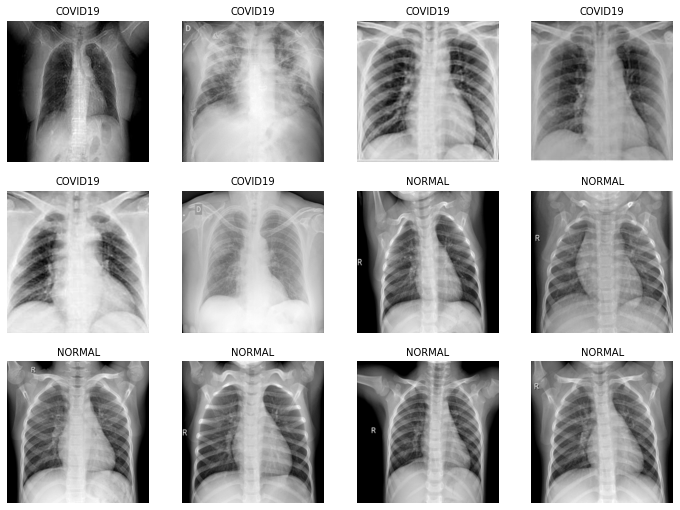

In [ ]:
import matplotlib.image as mpimg

rows = 4
cols = 4

fig = plt.gcf()
fig.set_size_inches(12,12)

covid_pic = [os.path.join(train_covid_dir,filename) for filename in train_covid_names[0:6]]
normal_pic = [os.path.join(train_normal_dir,filename) for filename in train_normal_names[0:6]]

print(covid_pic)
print(normal_pic)

merge_list = covid_pic + normal_pic
for i, img_path in enumerate(merge_list):
  data = img_path.split('/',11)[6]
  sp = plt.subplot(rows,cols,i+1)
  sp.axis("off")
  img = mpimg.imread(img_path)
  sp.set_title(data,fontsize=10)
  plt.imshow(img,cmap="gray")

plt.show()

In [ ]:
dgen_train = ImageDataGenerator(rescale=1./255,
                                validation_split = 0.2,
                                zoom_range = 0.1,
                                horizontal_flip = True
                                )
dgen_validation = ImageDataGenerator(rescale = 1./255)
dgen_test = ImageDataGenerator(rescale=1./255)


train_generator = dgen_train.flow_from_directory(train_dir,
                                                 target_size = (150,150),
                                                 subset = "training",
                                                 batch_size = 32,
                                                 class_mode = "binary")

validation_generator = dgen_train.flow_from_directory(train_dir,
                                                 target_size = (150,150),
                                                 subset = "validation",
                                                 batch_size = 32,
                                                 class_mode = "binary")


test_generator = dgen_test.flow_from_directory(test_dir,
                                                 target_size = (150,150),
                                                 batch_size = 32,
                                                 class_mode = "binary")

Found 1778 images belonging to 2 classes.
Found 443 images belonging to 2 classes.
Found 566 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'COVID19': 0, 'NORMAL': 1}

In [ ]:
model = Sequential()

model.add(Conv2D(32,(5,5),padding= 'SAME',activation = 'relu',input_shape=(150,150,3)))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.5))

model.add(Conv2D(64,(5,5),padding= 'SAME',activation = 'relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(256,activation = 'relu'))

model.add(Dropout(0.5))
model.add(Dense(1,activation = 'sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 75, 75, 64)        51264     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 87616)            

In [ ]:
model.compile(Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
history = model.fit(train_generator,
                    epochs = 100,
                    validation_data = validation_generator)


Epoch 1/100
56/56 [==============================] - 524s 9s/step - loss: 1.7416 - accuracy: 0.5427 - val_loss: 0.6713 - val_accuracy: 0.5892
Epoch 2/100
56/56 [==============================] - 148s 3s/step - loss: 0.6266 - accuracy: 0.6592 - val_loss: 0.5615 - val_accuracy: 0.7133
Epoch 3/100
56/56 [==============================] - 147s 3s/step - loss: 0.5687 - accuracy: 0.7025 - val_loss: 0.5047 - val_accuracy: 0.8104
Epoch 4/100
56/56 [==============================] - 149s 3s/step - loss: 0.5340 - accuracy: 0.7227 - val_loss: 0.4540 - val_accuracy: 0.8533
Epoch 5/100
56/56 [==============================] - 147s 3s/step - loss: 0.5153 - accuracy: 0.7430 - val_loss: 0.4451 - val_accuracy: 0.7472
Epoch 6/100
56/56 [==============================] - 148s 3s/step - loss: 0.5225 - accuracy: 0.7385 - val_loss: 0.4086 - val_accuracy: 0.8533
Epoch 7/100
56/56 [==============================] - 146s 3s/step - loss: 0.4824 - accuracy: 0.7649 - val_loss: 0.4792 - val_accuracy: 0.7269
Epoch 

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

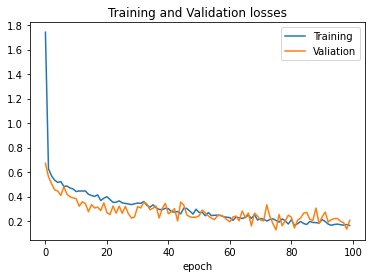

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training','Valiation'])
plt.title('Training and Validation losses')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

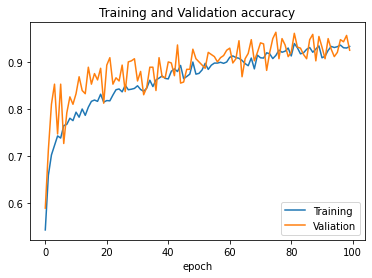

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training','Valiation'])
plt.title('Training and Validation accuracy')
plt.xlabel('epoch')

In [ ]:
test_loss , test_acc = model.evaluate(test_generator)
print('Test loss : {} Test acc : {}'.format(test_loss,test_acc))

18/18 [==============================] - 128s 7s/step - loss: 0.2245 - accuracy: 0.9187
Test loss : 0.2244960069656372 Test acc : 0.9187279343605042


In [ ]:
from google.colab import files
from keras_preprocessing import image

uploaded = files.upload()
for filename in uploaded.keys():
  img_path = '/content/'+filename
  img = image.load_img(img_path,target_size=(150,150))
  images = image.img_to_array(img)
  images = np.expand_dims(images,axis=0)
  prediction = model.predict(images)
  print(filename)


  if prediction == 0:
    print('COVID X-RAY IMAGE')
  else:
    print('NORMAL X-RAY IMAGE')

Saving Normal-656.png to Normal-656 (1).png
Normal-656.png
NORMAL X-RAY IMAGE
